In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from keras.models import Sequential

# Основные слои
from keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation
from keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D


In [4]:
values = pd.read_csv('MEP_2.csv')
print(values.shape)
#values = values.drop(values.columns[0], axis=1)
#Удаляем дублирующий индекс
#values = values.drop(values.columns[21], axis=1) #
values.head(2)

(216, 77)


,Т,Y1,Y2,X1,X2,X3,X4,X5,X6,X7,...,Z88,Z89,Z90,Z91,Z92,Z93,Z94,Z95,Z98,Z99
0,1/1/2005,1486.333333,2.62,99.4,515,1838.0,2859,386.0,148.1,80.9,...,151.5,1254.3,4298.2,3094,309,7168,9615,1624,1486.33,632.76
1,2/1/2005,1486.333333,1.23,99.1,530,1832.0,2542,357.7,184.5,89.9,...,157.5,1281.5,4373.8,2811,335,7647,9653,1905,1486.33,632.76


<AxesSubplot:>

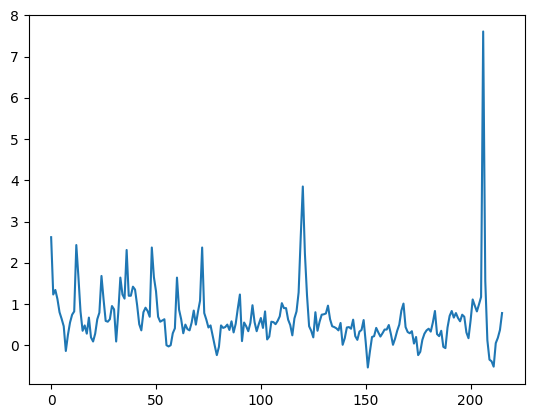

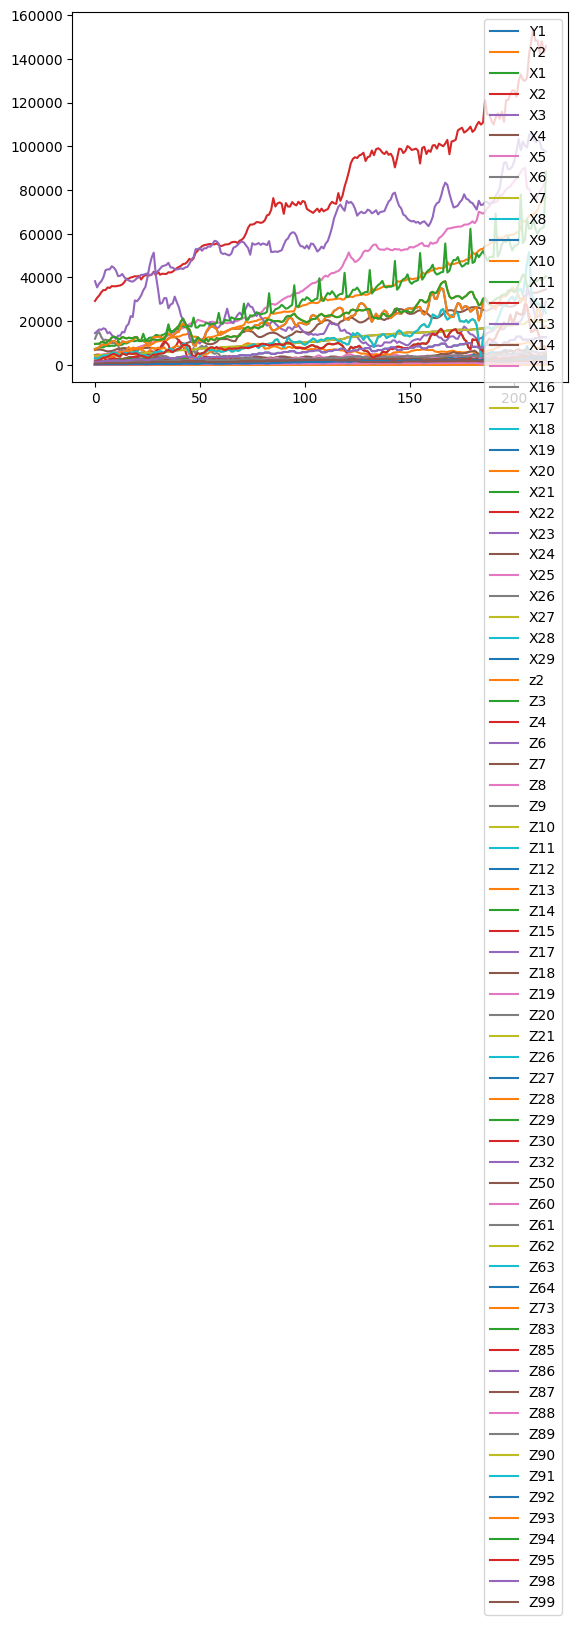

In [ ]:
values.Y2.plot()
values.plot()

In [ ]:
cor2 = corrs.Y1.sort_values()

Z28   -0.812
Z27   -0.811
X16   -0.668
Z18   -0.547
Z4    -0.412
       ...  
X12    0.982
Z87    0.984
X11    0.984
Z98    1.000
Y1     1.000
Name: Y1, Length: 76, dtype: float64

In [ ]:
values

,Т,Y1,Y2,X1,X2,X3,X4,X5,X6,X7,...,Z88,Z89,Z90,Z91,Z92,Z93,Z94,Z95,Z98,Z99
0,1/1/2005,1486.333333,2.62,99.4,515,1838.000000,2859,386.0,148.100000,80.9,...,151.5,1254.3,4298.2,3094,309,7168,9615,1624,1486.33,632.76
1,2/1/2005,1486.333333,1.23,99.1,530,1832.000000,2542,357.7,184.500000,89.9,...,157.5,1281.5,4373.8,2811,335,7647,9653,1905,1486.33,632.76
2,3/1/2005,1486.333333,1.34,100.0,570,2210.000000,2941,397.1,207.900000,109.2,...,172.6,1317.3,4445.3,3359,336,7994,9672,2097,1486.33,632.76
3,4/1/2005,1692.666667,1.12,100.1,525,2811.000000,3099,383.1,212.600000,114.9,...,178.7,1353.9,4504.2,3807,337,9126,10491,2787,1692.67,632.76
4,5/1/2005,1692.666667,0.80,100.7,482,3258.000000,3517,397.1,250.600000,129.1,...,183.8,1378.8,4542.6,4336,347,9358,10547,3195,1692.67,632.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,8/1/2022,12276.333330,-0.52,115.4,1253,3132.000000,4087,458.4,2232.066667,1188.4,...,1085.6,5636.4,19850.1,27859,3058,26367,38581,15488,12276.33,2130.01
212,9/1/2022,12276.333330,0.05,113.6,1348,2845.000000,3838,439.9,2232.066667,1274.1,...,1080.8,5500.6,19821.8,27675,3112,25014,39317,12638,12276.33,2130.02
213,10/1/2022,12700.000000,0.18,110.9,1474,2658.000000,3841,466.6,3749.600000,1301.8,...,1082.0,5500.1,19885.9,25345,3030,19367,38689,7742,12700.00,2130.03
214,11/1/2022,12700.000000,0.37,108.2,1671,2428.950000,3554,459.7,3749.600000,1297.2,...,1096.5,5511.3,19903.4,26172,3125,16956,39717,8597,12700.00,2130.04


In [ ]:
corrShift = values

In [ ]:
# corrShift['Y1'] = values['Y1'].shift(-6)
# corrShift['Y2'] = values['Y2'].shift(-6)

In [ ]:
corrShift

,Т,Y1,Y2,X1,X2,X3,X4,X5,X6,X7,...,Z88,Z89,Z90,Z91,Z92,Z93,Z94,Z95,Z98,Z99
0,1/1/2005,1948.333333,0.46,99.4,515,1838.000000,2859,386.0,148.100000,80.9,...,151.5,1254.3,4298.2,3094,309,7168,9615,1624,1486.33,632.76
1,2/1/2005,1948.333333,-0.14,99.1,530,1832.000000,2542,357.7,184.500000,89.9,...,157.5,1281.5,4373.8,2811,335,7647,9653,1905,1486.33,632.76
2,3/1/2005,1948.333333,0.25,100.0,570,2210.000000,2941,397.1,207.900000,109.2,...,172.6,1317.3,4445.3,3359,336,7994,9672,2097,1486.33,632.76
3,4/1/2005,2076.000000,0.55,100.1,525,2811.000000,3099,383.1,212.600000,114.9,...,178.7,1353.9,4504.2,3807,337,9126,10491,2787,1692.67,632.76
4,5/1/2005,2076.000000,0.74,100.7,482,3258.000000,3517,397.1,250.600000,129.1,...,183.8,1378.8,4542.6,4336,347,9358,10547,3195,1692.67,632.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,8/1/2022,NaN,NaN,115.4,1253,3132.000000,4087,458.4,2232.066667,1188.4,...,1085.6,5636.4,19850.1,27859,3058,26367,38581,15488,12276.33,2130.01
212,9/1/2022,NaN,NaN,113.6,1348,2845.000000,3838,439.9,2232.066667,1274.1,...,1080.8,5500.6,19821.8,27675,3112,25014,39317,12638,12276.33,2130.02
213,10/1/2022,NaN,NaN,110.9,1474,2658.000000,3841,466.6,3749.600000,1301.8,...,1082.0,5500.1,19885.9,25345,3030,19367,38689,7742,12700.00,2130.03
214,11/1/2022,NaN,NaN,108.2,1671,2428.950000,3554,459.7,3749.600000,1297.2,...,1096.5,5511.3,19903.4,26172,3125,16956,39717,8597,12700.00,2130.04


In [ ]:
corrs3 = corrShift.corr().round(3)
corrs3.style.background_gradient(cmap='coolwarm')

,Y1,Y2,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,z2,Z3,Z4,Z6,Z7,Z8,Z9,Z10,Z11,Z12,Z13,Z14,Z15,Z17,Z18,Z19,Z20,Z21,Z26,Z27,Z28,Z29,Z30,Z32,Z50,Z60,Z61,Z62,Z63,Z64,Z73,Z83,Z85,Z86,Z87,Z88,Z89,Z90,Z91,Z92,Z93,Z94,Z95,Z98,Z99
Y1,1.000000,-0.113000,-0.024000,0.669000,-0.011000,0.609000,0.777000,0.663000,0.747000,0.278000,0.911000,0.919000,0.938000,0.951000,0.971000,0.974000,0.971000,-0.653000,0.879000,0.912000,0.872000,0.933000,0.792000,0.966000,0.925000,0.962000,0.897000,-0.095000,-0.154000,-0.082000,-0.065000,0.981000,-0.261000,-0.425000,0.746000,0.278000,-0.087000,0.936000,0.896000,0.869000,0.863000,0.337000,-0.054000,0.227000,-0.280000,-0.565000,0.849000,-0.066000,0.869000,0.580000,-0.739000,-0.737000,0.959000,-0.065000,-0.422000,0.841000,0.785000,0.777000,0.063000,0.953000,-0.024000,0.305000,0.663000,0.911000,0.919000,0.938000,0.951000,0.971000,0.974000,0.879000,0.912000,0.872000,0.933000,0.792000,0.952000,0.419000
Y2,-0.113000,1.000000,-0.037000,-0.156000,0.364000,0.148000,-0.066000,-0.017000,0.040000,-0.015000,-0.075000,-0.058000,-0.093000,-0.114000,-0.124000,-0.133000,-0.102000,-0.015000,-0.076000,-0.119000,0.005000,-0.119000,0.008000,-0.138000,-0.092000,-0.168000,-0.176000,0.073000,0.136000,0.100000,-0.057000,-0.102000,0.149000,0.304000,0.042000,-0.014000,0.161000,-0.121000,-0.113000,-0.114000,-0.050000,0.127000,0.177000,0.074000,0.209000,-0.032000,0.006000,0.215000,-0.162000,0.064000,-0.052000,-0.057000,-0.114000,-0.055000,0.095000,-0.074000,-0.079000,-0.066000,0.269000,-0.118000,-0.037000,0.050000,-0.017000,-0.075000,-0.058000,-0.093000,-0.114000,-0.124000,-0.133000,-0.076000,-0.119000,0.005000,-0.119000,0.008000,-0.074000,0.055000
X1,-0.024000,-0.037000,1.000000,0.106000,-0.041000,-0.030000,0.057000,0.111000,0.105000,0.076000,0.069000,0.024000,0.059000,0.055000,0.048000,0.040000,0.034000,-0.115000,0.060000,0.063000,-0.013000,0.080000,0.026000,0.062000,0.049000,0.067000,0.077000,0.001000,0.031000,-0.081000,-0.054000,0.063000,0.016000,0.024000,0.105000,0.076000,0.181000,0.019000,0.040000,-0.018000,0.005000,0.061000,0.130000,0.079000,0.081000,0.101000,-0.016000,0.206000,-0.025000,0.095000,-0.113000,-0.115000,0.052000,-0.054000,0.136000,0.003000,0.051000,0.057000,0.179000,0.140000,1.000000,0.205000,0.111000,0.069000,0.024000,0.059000,0.055000,0.048000,0.040000,0.060000,0.063000,-0.013000,0.080000,0.026000,0.079000,0.130000
X2,0.669000,-0.156000,0.106000,1.000000,-0.304000,0.286000,0.747000,0.871000,0.836000,0.740000,0.738000,0.784000,0.822000,0.765000,0.691000,0.733000,0.739000,-0.498000,0.606000,0.685000,0.660000,0.727000,0.485000,0.719000,0.714000,0.746000,0.742000,-0.195000,-0.232000,-0.232000,-0.120000,0.718000,-0.292000,-0.378000,0.835000,0.740000,-0.132000,0.682000,0.632000,0.595000,0.585000,0.152000,-0.156000,0.141000,-0.294000,-0.478000,0.587000,-0.100000,0.666000,0.529000,-0.583000,-0.587000,0.788000,-0.120000,-0.304000,0.598000,0.744000,0.747000,0.271000,0.733000,0.106000,0.260000,0.871000,0.738000,0.784000,0.822000,0.765000,0.691000,0.733000,0.606000,0.685000,0.660000,0.727000,0.485000,0.783000,0.387000
X3,-0.011000,0.364000,-0.041000,-0.304000,1.000000,0.675000,-0.089000,-0.004000,0.132000,-0.224000,0.001000,0.034000,0.006000,0.016000,0.061000,0.020000,-0.001000,-0.001000,0.057000,0.063000,0.090000,-0.005000,0.098000,0.038000,0.006000,-0.071000,-0.222000,0.128000,0.251000,0.119000,-0.316000,0.029000,-0.028000,0.151000,0.132000,-0.224000,0.124000,0.009000,-0.006000,-0.037000,0.043000,0.113000,0.089000,0.053000,0.107000,0.003000,0.025000,0.087000,-0.032000,0.259000,-0.144000,-0.156000,0.021000,-0.315000,0.048000,0.031000,-0.106000,-0.089000,0.233000,0.042000,-0.041000,-0.022000,-0.004000,0.001000,0.034000,0.006000,0.016000,0.061000,0.020000,0.057000,0.063000,0.090000,-0.005000,0.098000,0.029000,-0.033000
X4,0.609000,0.148000,-0.030000,0.286000,0.675000,1.000000,0.507000,0.445000,0.589000,0.087000,0.541000,0.585000,0.625000,0.632000,0.652000,0.644000,

In [ ]:
corrs3['Y2'].sort_values()

X25   -0.176
X24   -0.168
Z21   -0.162
X2    -0.156
X22   -0.138
       ...  
Z20    0.215
Z62    0.269
Z4     0.304
X3     0.364
Y2     1.000
Name: Y2, Length: 76, dtype: float64

In [ ]:
corrs3['Y1'].sort_values()

Z27   -0.739
Z28   -0.737
X16   -0.653
Z18   -0.565
Z4    -0.425
       ...  
X13    0.971
Z90    0.974
X14    0.974
z2     0.981
Y1     1.000
Name: Y1, Length: 76, dtype: float64

<AxesSubplot:>

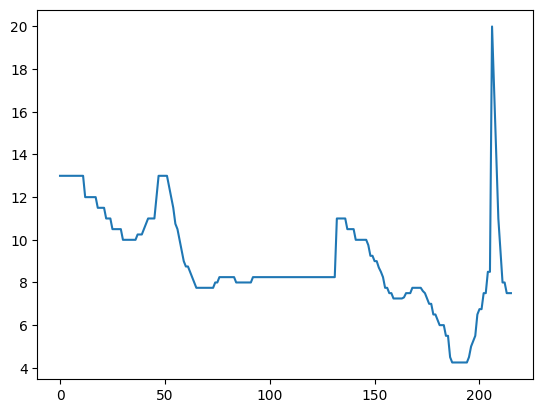

In [ ]:
values.Z18.plot()


<AxesSubplot:>

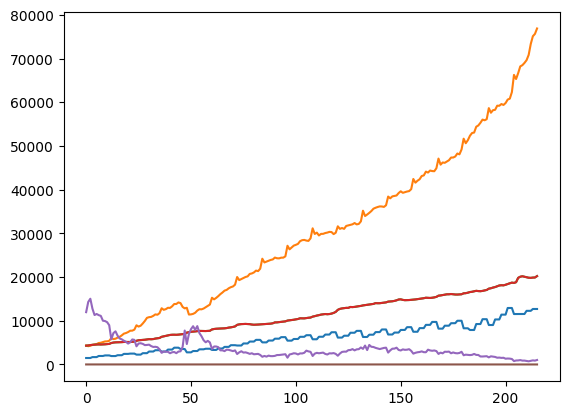

In [ ]:
#VVP
values.Y1.plot()
values.z2.plot()
values.X14.plot()
values.Z90.plot()
values.X16.plot()
values.Z18.plot()


<AxesSubplot:>

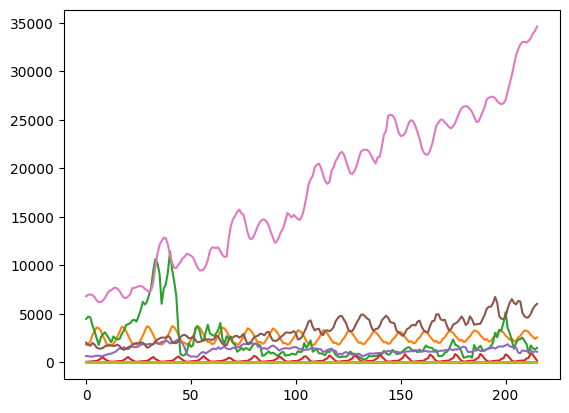

In [ ]:
#INFLIATION
values.Y2.plot()
values.X3.plot()
values.Z4.plot()
values.Z62.plot()
values.Z20.plot()
values.X25.plot()
values.X24.plot()
values.Z28.plot()
values.Z18.plot()


In [ ]:
corrs = values.corr().round(3)
corrs.style.background_gradient(cmap='coolwarm')

,Y1,Y2,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,z2,Z3,Z4,Z6,Z7,Z8,Z9,Z10,Z11,Z12,Z13,Z14,Z15,Z17,Z18,Z19,Z20,Z21,Z26,Z27,Z28,Z29,Z30,Z32,Z50,Z60,Z61,Z62,Z63,Z64,Z73,Z83,Z85,Z86,Z87,Z88,Z89,Z90,Z91,Z92,Z93,Z94,Z95,Z98,Z99
Y1,1.000000,-0.146000,0.079000,0.783000,0.029000,0.623000,0.820000,0.826000,0.882000,0.400000,0.953000,0.944000,0.984000,0.982000,0.962000,0.974000,0.972000,-0.668000,0.897000,0.929000,0.861000,0.962000,0.770000,0.970000,0.946000,0.956000,0.881000,-0.079000,-0.130000,-0.076000,-0.145000,0.976000,-0.302000,-0.412000,0.882000,0.400000,-0.024000,0.912000,0.856000,0.806000,0.833000,0.328000,-0.026000,0.282000,-0.239000,-0.547000,0.810000,-0.077000,0.851000,0.680000,-0.811000,-0.812000,0.967000,-0.145000,-0.300000,0.832000,0.820000,0.820000,0.311000,0.968000,0.079000,0.441000,0.826000,0.953000,0.944000,0.984000,0.982000,0.962000,0.974000,0.897000,0.929000,0.861000,0.962000,0.770000,1.000000,0.479000
Y2,-0.146000,1.000000,-0.058000,-0.116000,-0.321000,-0.330000,-0.096000,-0.175000,-0.210000,0.016000,-0.003000,-0.108000,-0.125000,-0.152000,-0.089000,-0.140000,-0.113000,0.073000,0.002000,-0.184000,-0.202000,-0.124000,0.022000,-0.160000,-0.064000,-0.092000,0.070000,0.403000,-0.007000,0.190000,0.999000,-0.125000,0.072000,0.169000,-0.207000,0.016000,0.019000,-0.002000,0.009000,0.092000,0.042000,0.020000,0.221000,0.202000,0.203000,0.366000,-0.113000,-0.032000,0.004000,-0.272000,0.161000,0.171000,-0.104000,0.999000,0.370000,-0.097000,-0.085000,-0.096000,-0.338000,-0.170000,-0.058000,0.050000,-0.175000,-0.003000,-0.108000,-0.125000,-0.152000,-0.089000,-0.140000,0.002000,-0.184000,-0.202000,-0.124000,0.022000,-0.146000,-0.044000
X1,0.079000,-0.058000,1.000000,0.106000,-0.041000,-0.030000,0.057000,0.111000,0.105000,0.076000,0.069000,0.024000,0.059000,0.055000,0.048000,0.040000,0.034000,-0.115000,0.060000,0.063000,-0.013000,0.080000,0.026000,0.062000,0.049000,0.067000,0.077000,0.001000,0.031000,-0.081000,-0.054000,0.063000,0.016000,0.024000,0.105000,0.076000,0.181000,0.019000,0.040000,-0.018000,0.005000,0.061000,0.130000,0.079000,0.081000,0.101000,-0.016000,0.206000,-0.025000,0.095000,-0.113000,-0.115000,0.052000,-0.054000,0.136000,0.003000,0.051000,0.057000,0.179000,0.140000,1.000000,0.205000,0.111000,0.069000,0.024000,0.059000,0.055000,0.048000,0.040000,0.060000,0.063000,-0.013000,0.080000,0.026000,0.079000,0.130000
X2,0.783000,-0.116000,0.106000,1.000000,-0.304000,0.286000,0.747000,0.871000,0.836000,0.740000,0.738000,0.784000,0.822000,0.765000,0.691000,0.733000,0.739000,-0.498000,0.606000,0.685000,0.660000,0.727000,0.485000,0.719000,0.714000,0.746000,0.742000,-0.195000,-0.232000,-0.232000,-0.120000,0.718000,-0.292000,-0.378000,0.835000,0.740000,-0.132000,0.682000,0.632000,0.595000,0.585000,0.152000,-0.156000,0.141000,-0.294000,-0.478000,0.587000,-0.100000,0.666000,0.529000,-0.583000,-0.587000,0.788000,-0.120000,-0.304000,0.598000,0.744000,0.747000,0.271000,0.733000,0.106000,0.260000,0.871000,0.738000,0.784000,0.822000,0.765000,0.691000,0.733000,0.606000,0.685000,0.660000,0.727000,0.485000,0.783000,0.387000
X3,0.029000,-0.321000,-0.041000,-0.304000,1.000000,0.675000,-0.089000,-0.004000,0.132000,-0.224000,0.001000,0.034000,0.006000,0.016000,0.061000,0.020000,-0.001000,-0.001000,0.057000,0.063000,0.090000,-0.005000,0.098000,0.038000,0.006000,-0.071000,-0.222000,0.128000,0.251000,0.119000,-0.316000,0.029000,-0.028000,0.151000,0.132000,-0.224000,0.124000,0.009000,-0.006000,-0.037000,0.043000,0.113000,0.089000,0.053000,0.107000,0.003000,0.025000,0.087000,-0.032000,0.259000,-0.144000,-0.156000,0.021000,-0.315000,0.048000,0.031000,-0.106000,-0.089000,0.233000,0.042000,-0.041000,-0.022000,-0.004000,0.001000,0.034000,0.006000,0.016000,0.061000,0.020000,0.057000,0.063000,0.090000,-0.005000,0.098000,0.029000,-0.033000
X4,0.623000,-0.330000,-0.030000,0.286000,0.675000,1.000000,0.507000,0.445000,0.589000,0.087000,0.541000,0.585000,0.625000,0.632000,0.652000,0.644000,0.6080

In [ ]:
# ['Z58','X11','Z70','X12','Z66','X26','Z11','Z21','Z9','Z10','X10','Z25','Z71','X25','Z62']
# Для инфляции
#DF_hi_korr = values[['X11','X12','X26','Z11','Z9','Z10','X10','X25','Z62']]
print(DF_hi_korr.shape)


(216, 6)


In [155]:
# #Для ВВП #VVP
# values.z2.plot()
# values.X14.plot()
# values.Z90.plot()
# values.X16.plot()
# values.Z18.plot()
DF_hi_korr = values[['z2','X14','Z90','X16','Z18','Y2']]
print(DF_hi_korr.shape)

(216, 6)


In [156]:
x_train = DF_hi_korr.iloc[70:190]/5000
x_train = x_train.reset_index(drop=True)

x_test = DF_hi_korr.iloc[:70]/5000

print(x_train.shape,x_test.shape)

(120, 6) (70, 6)


<Axes: >

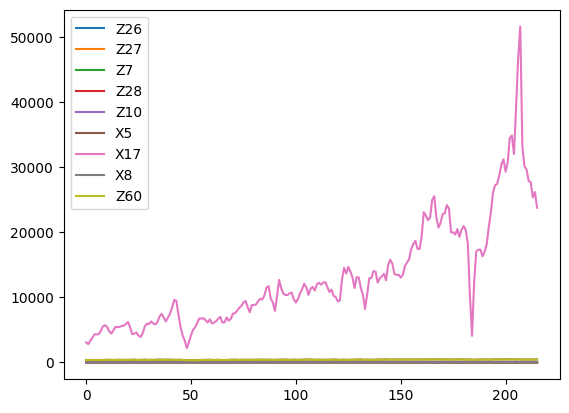

In [ ]:
DF_hi_korr.plot()

In [157]:
y_train_VVP = values.iloc[70:].filter(like='Y1')/10000
y_train_VVP = y_train_VVP.reset_index(drop=True)
# y_train_INF = pd.concat([values[:50].filter(like='Y2'),values[105:].filter(like='Y2')])
# y_train_INF = y_train_INF.reset_index(drop=True)
print(y_train_VVP.shape)


(146, 1)


In [158]:

y_test_vvp = values.iloc[:80].filter(like='Y1')/10000
y_test_vvp = y_test_vvp.reset_index(drop=True)
y_test_vvp.shape
# y_test_inf = values[50:95].filter(like='Y2')
# y_test_inf = y_test_inf.reset_index(drop=True)

(80, 1)

<Axes: >

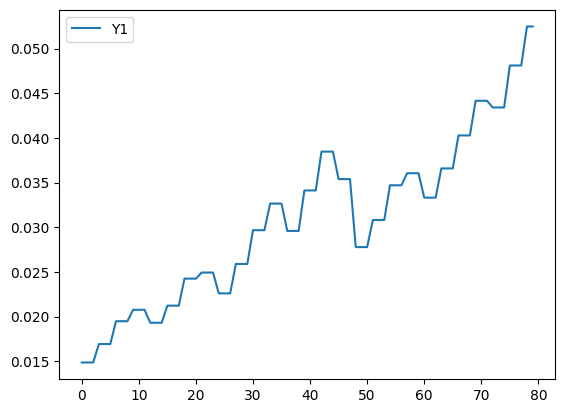

In [77]:
y_test_vvp.plot()

<AxesSubplot:>

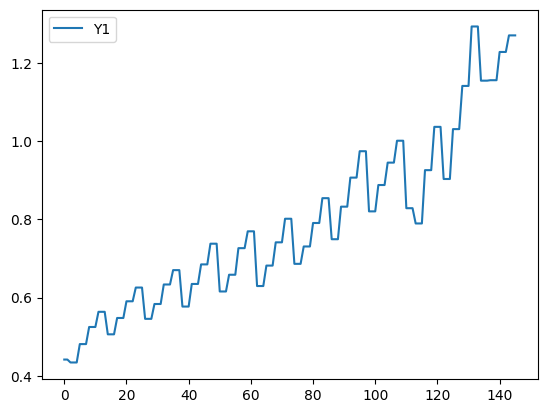

In [ ]:
y_train_VVP.plot()

In [159]:
time_steps=5
features = 6

In [160]:
# Инициализация массива x_train
x_train2 = np.zeros((x_train.shape[0] - time_steps + 1, time_steps, features))
y_train_v = np.zeros((x_train.shape[0] - time_steps + 1))
# Заполнение массива x_train окнами размером time_steps
for i in range(x_train.shape[0] - time_steps + 1):
    x_train2[i] = x_train.iloc[i:i+time_steps].values
    y_train_v[i] = y_train_VVP.iloc[i+time_steps+1:i+time_steps+2].values

print(x_train2.shape,y_train_v.shape)

(116, 5, 6) (116,)


In [161]:
# Инициализация массива x_test
x_test2 = np.zeros((x_test.shape[0] - time_steps + 1, time_steps, features))
y_test_v = np.zeros((x_test.shape[0] - time_steps + 1))
# Заполнение массива x_test окнами размером time_steps
for i in range(x_test.shape[0] - time_steps + 1):
    x_test2[i] = x_test.iloc[i:i+time_steps].values
    y_test_v[i] = y_test_vvp.iloc[i+time_steps+1:i+time_steps+2].values

print(x_test2.shape, y_test_v.shape)

(66, 5, 6) (66,)


In [170]:
model2 = Sequential()
model2.add(LSTM(units=170, input_shape=(time_steps, features)))
model2.add(Dense(units = 300))
model2.add(Dense(units = 50))
model2.add(Dense(units=1))
model2.compile(loss='mae', optimizer='adam')
model2.fit(x_train2, y_train_v, epochs=120, batch_size=45, validation_data=(x_test2, y_test_v))

Epoch 1/120
3/3 [==============================] - 3s 352ms/step - loss: 0.9992 - val_loss: 0.2388
Epoch 2/120
3/3 [==============================] - 0s 31ms/step - loss: 0.4463 - val_loss: 0.2015
Epoch 3/120
3/3 [==============================] - 0s 23ms/step - loss: 0.3178 - val_loss: 0.1555
Epoch 4/120
3/3 [==============================] - 0s 26ms/step - loss: 0.2392 - val_loss: 0.0324
Epoch 5/120
3/3 [==============================] - 1s 239ms/step - loss: 0.1347 - val_loss: 0.0336
Epoch 6/120
3/3 [==============================] - 0s 38ms/step - loss: 0.0919 - val_loss: 0.0543
Epoch 7/120
3/3 [==============================] - 0s 33ms/step - loss: 0.0830 - val_loss: 0.0686
Epoch 8/120
3/3 [==============================] - 0s 38ms/step - loss: 0.0785 - val_loss: 0.0461
Epoch 9/120
3/3 [==============================] - 0s 37ms/step - loss: 0.0758 - val_loss: 0.0898
Epoch 10/120
3/3 [==============================] - 0s 43ms/step - loss: 0.0603 - val_loss: 0.0517
Epoch 11/120
3/3 

In [182]:
model2.fit(x_train2, y_train_v, epochs=135, batch_size=4, validation_data=(x_test2, y_test_v))

Epoch 1/135
29/29 [==============================] - 0s 9ms/step - loss: 0.0485 - val_loss: 0.1582
Epoch 2/135
29/29 [==============================] - 0s 9ms/step - loss: 0.0468 - val_loss: 0.1937
Epoch 3/135
29/29 [==============================] - 2s 71ms/step - loss: 0.0474 - val_loss: 0.2130
Epoch 4/135
29/29 [==============================] - 0s 9ms/step - loss: 0.0489 - val_loss: 0.2086
Epoch 5/135
29/29 [==============================] - 0s 8ms/step - loss: 0.0505 - val_loss: 0.1504
Epoch 6/135
29/29 [==============================] - 0s 9ms/step - loss: 0.0486 - val_loss: 0.2374
Epoch 7/135
29/29 [==============================] - 0s 10ms/step - loss: 0.0467 - val_loss: 0.1485
Epoch 8/135
29/29 [==============================] - 0s 8ms/step - loss: 0.0502 - val_loss: 0.1819
Epoch 9/135
29/29 [==============================] - 2s 57ms/step - loss: 0.0486 - val_loss: 0.2169
Epoch 10/135
29/29 [==============================] - 1s 37ms/step - loss: 0.0521 - val_loss: 0.1848
Epoch

In [183]:
pref_dfv1 = model2.predict(x_test2)

3/3 [==============================] - 0s 115ms/step


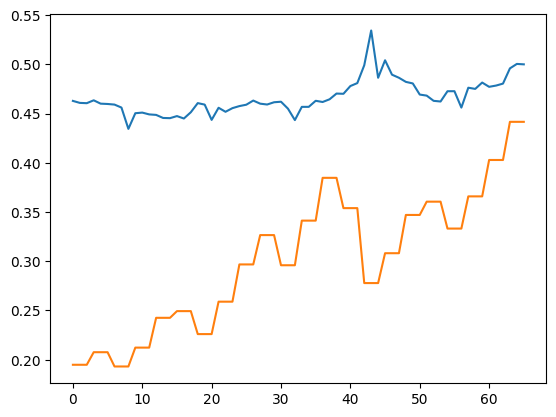

In [184]:
plt.plot(pref_dfv1)
plt.plot(y_test_v)

4/4 [==============================] - 0s 27ms/step


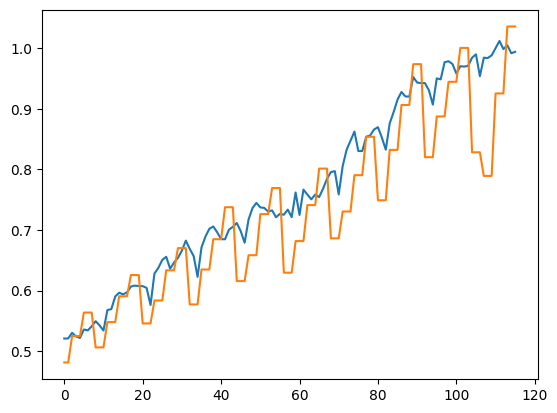

In [185]:
pref_dfv1 = model2.predict(x_train2)
plt.plot(pref_dfv1)
plt.plot(y_train_v)

In [192]:
# Создание LSTM модели для ВВП
model_v = Sequential()
model_v.add(LSTM(250, input_shape=(time_steps, features)))

model_v.add(Dense(300))
model_v.add(Dense(100))
model_v.add(Dense(10))

model_v.add(Dense(1))

# Компиляция модели
model_v.compile(optimizer='adam', loss='mse')

# Обучение модели
model_v.fit(x_train2, y_train_v, epochs=350, batch_size=6, validation_data=(x_test2, y_test_v))

Epoch 1/350
20/20 [==============================] - 4s 86ms/step - loss: 0.4329 - val_loss: 0.0054
Epoch 2/350
20/20 [==============================] - 0s 13ms/step - loss: 0.0263 - val_loss: 0.0017
Epoch 3/350
20/20 [==============================] - 0s 14ms/step - loss: 0.0060 - val_loss: 0.0011
Epoch 4/350
20/20 [==============================] - 0s 16ms/step - loss: 0.0042 - val_loss: 0.0011
Epoch 5/350
20/20 [==============================] - 1s 57ms/step - loss: 0.0035 - val_loss: 8.7468e-04
Epoch 6/350
20/20 [==============================] - 1s 30ms/step - loss: 0.0036 - val_loss: 9.5422e-04
Epoch 7/350
20/20 [==============================] - 0s 12ms/step - loss: 0.0035 - val_loss: 8.8574e-04
Epoch 8/350
20/20 [==============================] - 0s 15ms/step - loss: 0.0043 - val_loss: 0.0014
Epoch 9/350
20/20 [==============================] - 0s 15ms/step - loss: 0.0040 - val_loss: 0.0011
Epoch 10/350
20/20 [==============================] - 1s 59ms/step - loss: 0.0034 - val_

In [194]:
model_v.fit(x_train2, y_train_v, epochs=10, batch_size=4, validation_data=(x_test2, y_test_v))

Epoch 1/10
29/29 [==============================] - 1s 37ms/step - loss: 0.0036 - val_loss: 0.0292
Epoch 2/10
29/29 [==============================] - 0s 13ms/step - loss: 0.0038 - val_loss: 0.0167
Epoch 3/10
29/29 [==============================] - 0s 12ms/step - loss: 0.0050 - val_loss: 0.0205
Epoch 4/10
29/29 [==============================] - 1s 42ms/step - loss: 0.0047 - val_loss: 0.0325
Epoch 5/10
29/29 [==============================] - 0s 13ms/step - loss: 0.0050 - val_loss: 0.0567
Epoch 6/10
29/29 [==============================] - 1s 41ms/step - loss: 0.0052 - val_loss: 0.0355
Epoch 7/10
29/29 [==============================] - 1s 53ms/step - loss: 0.0036 - val_loss: 0.0196
Epoch 8/10
29/29 [==============================] - 0s 13ms/step - loss: 0.0032 - val_loss: 0.0190
Epoch 9/10
29/29 [==============================] - 1s 44ms/step - loss: 0.0035 - val_loss: 0.0211
Epoch 10/10
29/29 [==============================] - 1s 22ms/step - loss: 0.0038 - val_loss: 0.0151


4/4 [==============================] - 0s 6ms/step


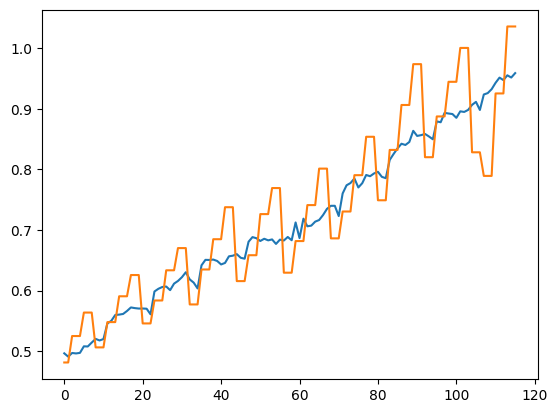

In [195]:
pred_dfv = model_v.predict(x_train2)
plt.plot(pred_dfv)
plt.plot(y_train_v)

In [89]:
DF_hi_korr = values[['X3','Z4','Z62','Z20','X25','X24','Z28','Z18','Y1']]
print(DF_hi_korr.shape)

(216, 9)


<AxesSubplot:>

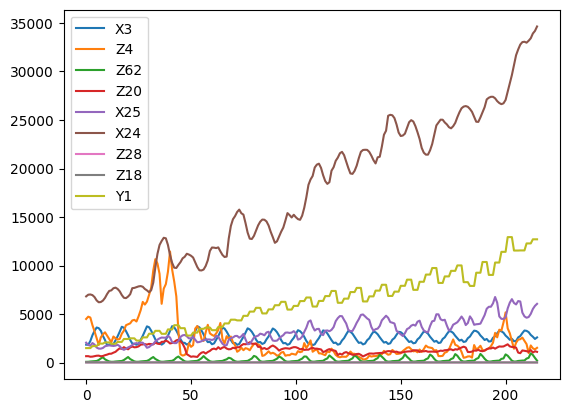

In [ ]:
DF_hi_korr.plot()

In [90]:
# Для инфляции
# values.X3.plot()
# values.Z4.plot()
# values.Z62.plot()
# values.Z20.plot()
# values.X25.plot()
# values.X24.plot()
# values.Z28.plot()
# values.Z18.plot()

#DF_hi_korr = values[['X3','Z4','Z62','Z20','X25','X24','Z28','Z18','Y1']]
#print(DF_hi_korr.shape)

x_train = DF_hi_korr.iloc[74:180]/10000
x_train = x_train.reset_index(drop=True)

x_test = DF_hi_korr.iloc[:70]/10000
x_test = x_test.reset_index(drop=True)

print(x_train.shape,x_test.shape)


(106, 9) (70, 9)


<AxesSubplot:>

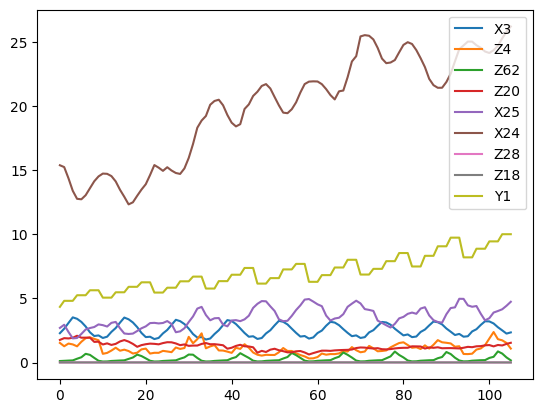

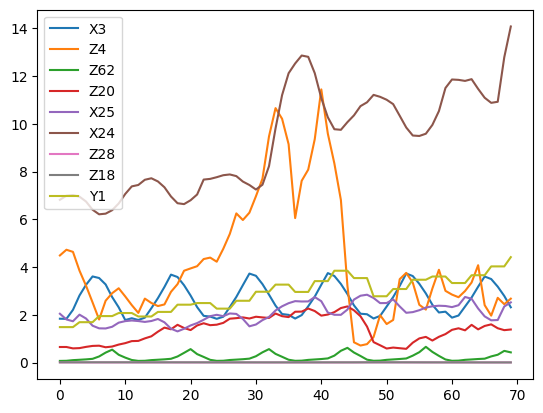

In [ ]:
x_train.plot()
x_test.plot()

In [103]:
# y_train_VVP = pd.concat([values[:50].filter(like='Y1'),values[105:].filter(like='Y1')])
# y_train_VVP = y_train_VVP.reset_index(drop=True)
#y_train_INF = pd.concat([values[:50].filter(like='Y2'),values[105:].filter(like='Y2')])
y_train_INF = values.iloc[70:].filter(like='Y2')+10
y_train_INF = y_train_INF.reset_index(drop=True)
print(y_train_INF.shape)

(146, 1)


In [104]:
# y_test_vvp = values[50:95].filter(like='Y1')
# y_test_vvp = y_test_vvp.reset_index(drop=True)
y_test_inf = values.iloc[:80].filter(like='Y2')+10
y_test_inf = y_test_inf.reset_index(drop=True)
print(y_test_inf.shape)

(80, 1)


In [120]:
time_steps=5
features = 9

In [121]:
# Инициализация массива x_train
x_train2 = np.zeros((x_train.shape[0] - time_steps + 1, time_steps, features))
y_train_i = np.zeros((x_train.shape[0] - time_steps + 1))
# Заполнение массива x_train окнами размером time_steps
for i in range(x_train.shape[0] - time_steps + 1):
    x_train2[i] = x_train.iloc[i:i+time_steps].values
    y_train_i[i] = y_train_INF.iloc[i+time_steps+1:i+time_steps+2].values

print(x_train2.shape,y_train_i.shape)

(102, 5, 9) (102,)


In [122]:
# Инициализация массива x_test
x_test2 = np.zeros((x_test.shape[0] - time_steps + 1, time_steps, features))
y_test_i = np.zeros((x_test.shape[0] - time_steps + 1))
# Заполнение массива x_test окнами размером time_steps
for i in range(x_test.shape[0] - time_steps + 1):
    x_test2[i] = x_test.iloc[i:i+time_steps].values
    y_test_i[i] = y_test_inf.iloc[i+time_steps+1:i+time_steps+2].values

print(x_test2.shape, y_test_i.shape)

(66, 5, 9) (66,)


In [132]:
# Создание LSTM модели для INFLATION
model_i = Sequential()
model_i.add(LSTM(60, input_shape=(time_steps, features)))
model_i.add(Dense(100))
model_i.add(Dense(200))
model_i.add(Dense(1))

# Компиляция модели
model_i.compile(optimizer='adam', loss='mae')


In [133]:

# Обучение модели
model_i.fit(x_train2, y_train_i, epochs=5, batch_size=26, validation_data=(x_test2, y_test_i))

Epoch 1/5
4/4 [==============================] - 2s 123ms/step - loss: 10.0796 - val_loss: 8.4266
Epoch 2/5
4/4 [==============================] - 0s 14ms/step - loss: 7.0220 - val_loss: 4.8751
Epoch 3/5
4/4 [==============================] - 0s 17ms/step - loss: 2.6321 - val_loss: 1.2259
Epoch 4/5
4/4 [==============================] - 0s 11ms/step - loss: 2.2257 - val_loss: 1.8653
Epoch 5/5
4/4 [==============================] - 0s 16ms/step - loss: 1.2928 - val_loss: 1.5019


In [148]:
# Обучение модели
model_i.fit(x_train2, y_train_i, epochs=145, batch_size=8, validation_data=(x_test2, y_test_i))

Epoch 1/145
13/13 [==============================] - 0s 9ms/step - loss: 0.2825 - val_loss: 2.5520
Epoch 2/145
13/13 [==============================] - 0s 6ms/step - loss: 0.2423 - val_loss: 2.3382
Epoch 3/145
13/13 [==============================] - 0s 6ms/step - loss: 0.2673 - val_loss: 2.7182
Epoch 4/145
13/13 [==============================] - 0s 6ms/step - loss: 0.3155 - val_loss: 2.7063
Epoch 5/145
13/13 [==============================] - 0s 6ms/step - loss: 0.2558 - val_loss: 2.6506
Epoch 6/145
13/13 [==============================] - 0s 6ms/step - loss: 0.2618 - val_loss: 2.6896
Epoch 7/145
13/13 [==============================] - 0s 7ms/step - loss: 0.3014 - val_loss: 2.6104
Epoch 8/145
13/13 [==============================] - 0s 7ms/step - loss: 0.2287 - val_loss: 2.4364
Epoch 9/145
13/13 [==============================] - 0s 8ms/step - loss: 0.2479 - val_loss: 2.5958
Epoch 10/145
13/13 [==============================] - 0s 6ms/step - loss: 0.2351 - val_loss: 2.7518
Epoch 11/

3/3 [==============================] - 0s 3ms/step


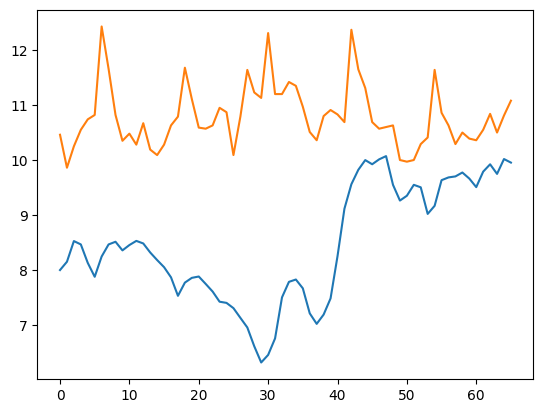

In [149]:
pred_df_i = model_i.predict(x_test2)
plt.plot(pred_df_i)
plt.plot(y_test_i)

4/4 [==============================] - 0s 2ms/step


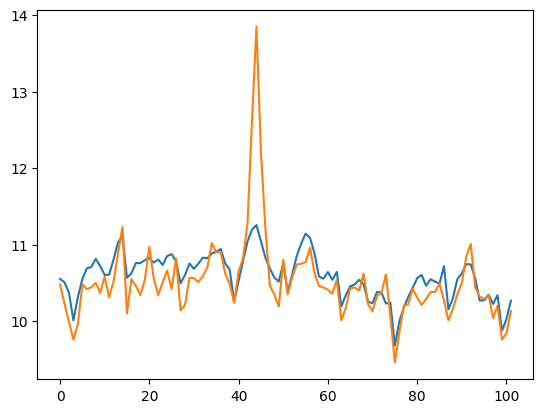

In [150]:
pred_df_i = model_i.predict(x_train2)
plt.plot(pred_df_i)
plt.plot(y_train_i)

In [152]:

# save the model architecture
model_json = model_i.to_json()
with open("model_RAN1.json", "w") as json_file:
    json_file.write(model_json)


In [153]:

# save the model weights
model_i.save_weights("model_RAN1_weights.h5")